In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mervesafaakta","key":"987bcc8c5c6cc88e19770fdf2af17203"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fivethirtyeight/the-ultimate-halloween-candy-power-ranking

  0% 0.00/2.06k [00:00<?, ?B/s]
100% 2.06k/2.06k [00:00<00:00, 3.96MB/s]


In [ ]:
!ls

kaggle.json  sample_data  the-ultimate-halloween-candy-power-ranking.zip


In [ ]:
!unzip the-ultimate-halloween-candy-power-ranking.zip

Archive:  the-ultimate-halloween-candy-power-ranking.zip
  inflating: candy-data.csv          


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/candy-data.csv")

In [ ]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
data.iloc[0]

competitorname      100 Grand
chocolate                   1
fruity                      0
caramel                     1
peanutyalmondy              0
nougat                      0
crispedricewafer            1
hard                        0
bar                         1
pluribus                    0
sugarpercent            0.732
pricepercent             0.86
winpercent          66.971725
Name: 0, dtype: object

In [ ]:
data.loc[0]

competitorname      100 Grand
chocolate                   1
fruity                      0
caramel                     1
peanutyalmondy              0
nougat                      0
crispedricewafer            1
hard                        0
bar                         1
pluribus                    0
sugarpercent            0.732
pricepercent             0.86
winpercent          66.971725
Name: 0, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [ ]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [ ]:
data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [ ]:
categoric_columns=['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
numeric_columns=['sugarpercent','pricepercent', 'winpercent']

In [ ]:
def plot_boxplot(data_,columns_categoric,columns_numeric):
  fig,axes=plt.subplots(len(columns_categoric),len(columns_numeric),figsize=(25,30))
  for j in range(len(columns_categoric)):
    for i in range(len(columns_numeric)):
      sns.boxplot(x=columns_categoric[j],y=columns_numeric[i],data=data_,ax=axes[j,i])

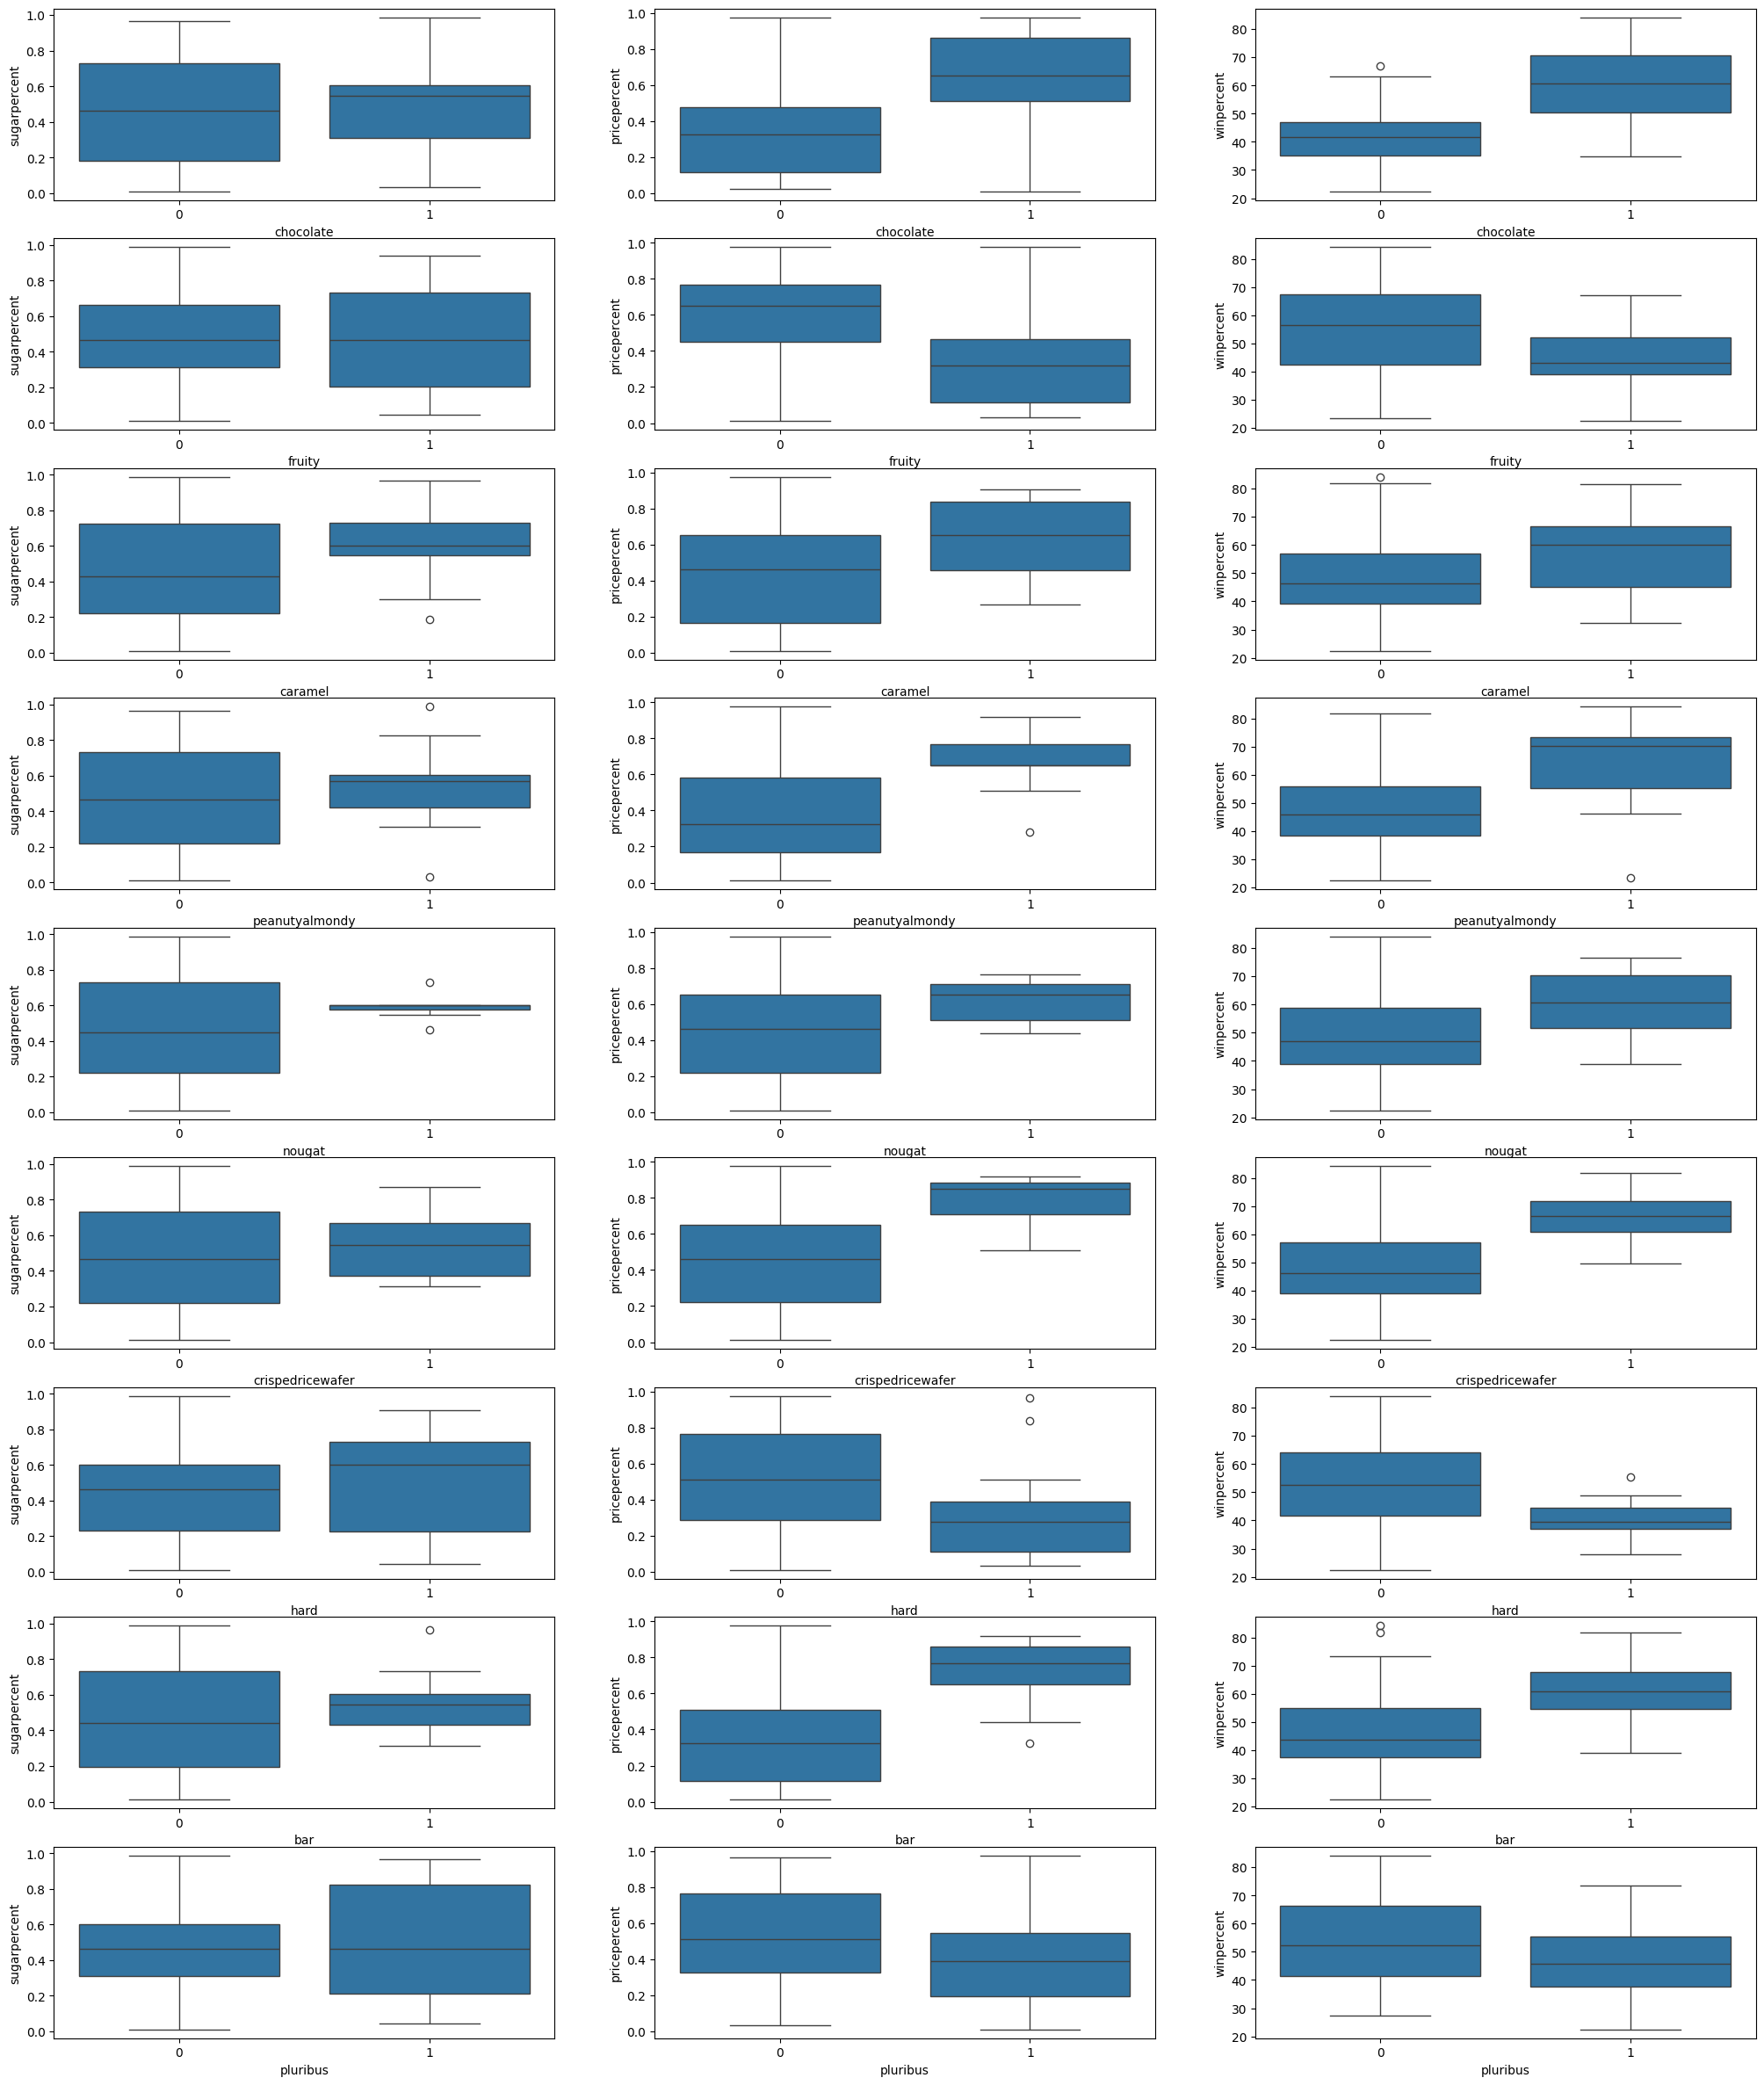

In [ ]:
#A box plot is a type of graph used to visualize the distribution of a dataset.
#It typically displays the five-number summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values.
#It can also help identify outliers.
#This is because a box plot is used to show the distribution of a categorical variable (usually on the x-axis) against the values of a numerical variable (usually on the y-axis).
plot_boxplot(data,categoric_columns,numeric_columns)

In [ ]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
data_=data.drop('competitorname',axis=1)

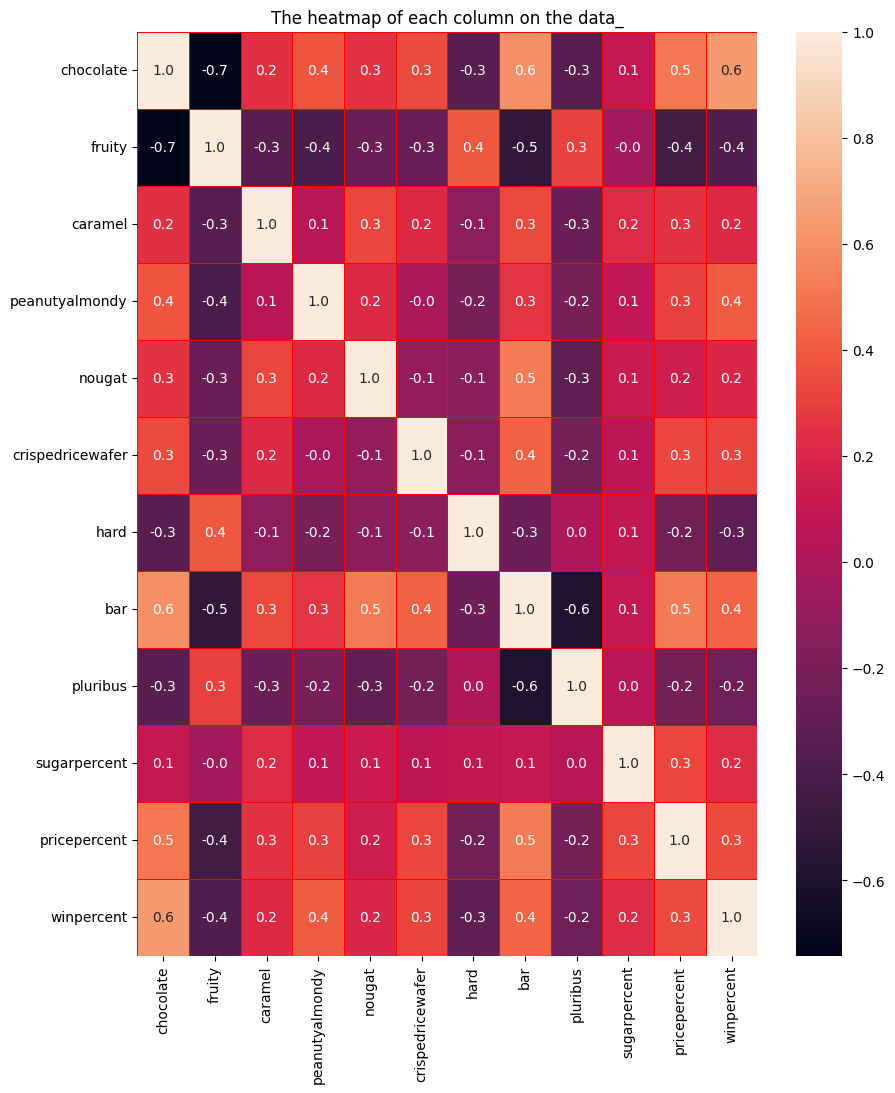

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(data_.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f')
plt.title("The heatmap of each column on the data_")
plt.show()

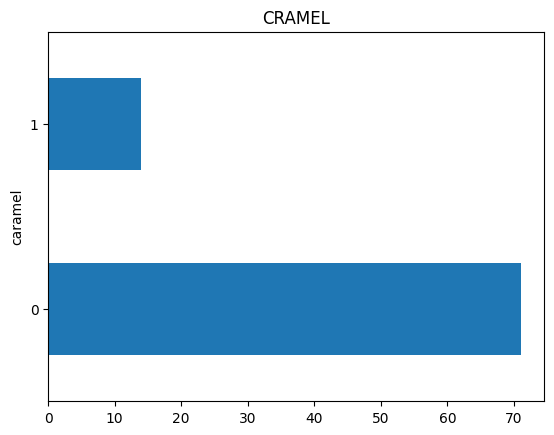

In [ ]:
#Visualization of the class values for each of the categorical variables:
data_["caramel"].value_counts().plot.barh().set_title("CARAMEL")

Text(0.5, 1.0, 'Chocolate')

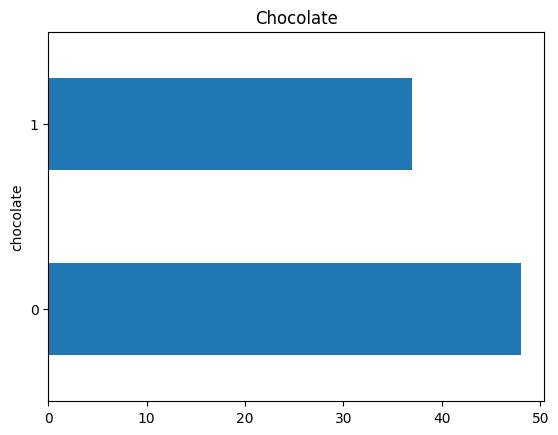

In [ ]:
data_["chocolate"].value_counts().plot.barh().set_title("Chocolate")

Text(0.5, 1.0, 'Fruity')

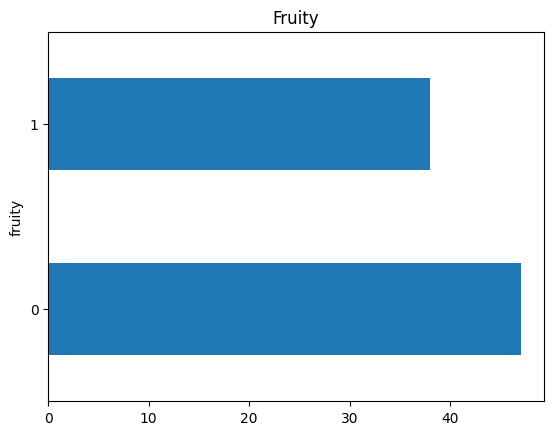

In [ ]:
data_["fruity"].value_counts().plot.barh().set_title("Fruity")

In [ ]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
#Separate the data as train and test
x=data.drop(['competitorname','winpercent'],axis=1)
y=data['winpercent']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [ ]:
#Creating ANN:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(len(x_train.iloc[0].values),)))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])

In [ ]:
history=model.fit(x_train,y_train,epochs=150)

Epoch 1/150
3/3 [==============================] - 1s 6ms/step - loss: 48.7742 - mae: 48.7742
Epoch 2/150
3/3 [==============================] - 0s 5ms/step - loss: 48.7127 - mae: 48.7127
Epoch 3/150
3/3 [==============================] - 0s 5ms/step - loss: 48.6520 - mae: 48.6520
Epoch 4/150
3/3 [==============================] - 0s 5ms/step - loss: 48.5891 - mae: 48.5891
Epoch 5/150
3/3 [==============================] - 0s 5ms/step - loss: 48.5259 - mae: 48.5259
Epoch 6/150
3/3 [==============================] - 0s 5ms/step - loss: 48.4571 - mae: 48.4571
Epoch 7/150
3/3 [==============================] - 0s 5ms/step - loss: 48.3865 - mae: 48.3865
Epoch 8/150
3/3 [==============================] - 0s 5ms/step - loss: 48.3113 - mae: 48.3113
Epoch 9/150
3/3 [==============================] - 0s 6ms/step - loss: 48.2326 - mae: 48.2326
Epoch 10/150
3/3 [==============================] - 0s 6ms/step - loss: 48.1520 - mae: 48.1520
Epoch 11/150
3/3 [==============================] - 0s 6ms/

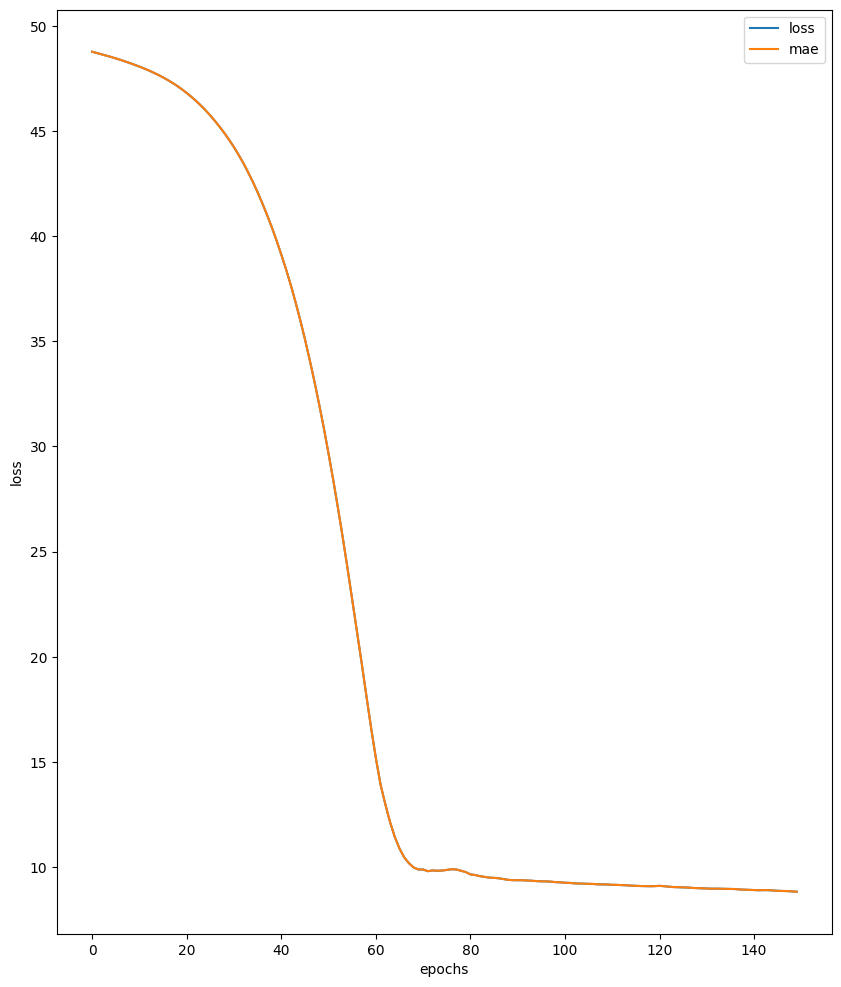

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,12))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()